In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('biomarker_response_data.csv')


In [3]:
data = data.dropna()
X = data[['age', 'genetic_marker', 'blood_level']]
y = data['response']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       141
           1       0.54      0.12      0.19        59

    accuracy                           0.71       200
   macro avg       0.63      0.54      0.51       200
weighted avg       0.67      0.71      0.64       200



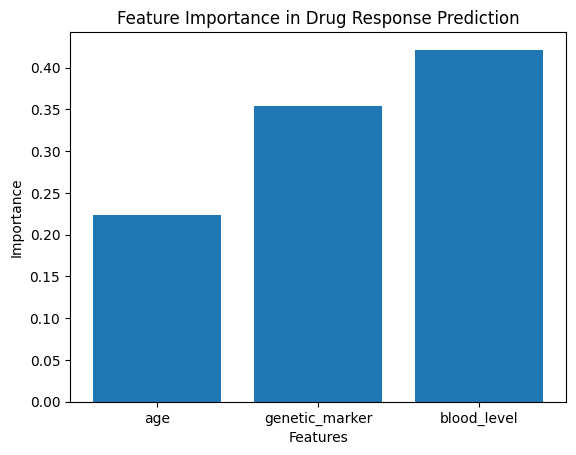

In [7]:
importance = model.feature_importances_
features = X.columns
plt.bar(features, importance)
plt.title("Feature Importance in Drug Response Prediction")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [10]:
new_patient = pd.DataFrame([[45, 0.7, 50]], columns=['age', 'genetic_marker', 'blood_level'])
new_patient_scaled = scaler.transform(new_patient)
prediction = model.predict(new_patient_scaled)
print("Predicted Response (1 = Positive, 0 = Negative):", prediction[0])


Predicted Response (1 = Positive, 0 = Negative): 0
